In [36]:
import numpy as np
import matplotlib.pyplot as plt

def distance(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return np.sqrt(np.sum((x1 - x2)**2))

def k_means(data, k, max_iters=100):
    centroids = [data[i] for i in range(k)]

    for _ in range(max_iters):
        clusters = [[] for _ in range(k)]

        for point in data:
            distances = [distance(point, centroid) for centroid in centroids]
            closest = distances.index(min(distances))
            clusters[closest].append(point)

        new_centroids = []
        for i, cluster in enumerate(clusters):
            if cluster:
                new_centroids.append(np.mean(cluster, axis=0).tolist())
            else:
                new_centroids.append(centroids[i])

        if new_centroids == centroids:
            break

        centroids = new_centroids

    return centroids, clusters


def plot_clusters(centroids, clusters, title):
    colors = plt.colormaps['tab10'].resampled(len(clusters))

    for i, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        if len(cluster) > 0:
            plt.scatter(cluster[:, 0], cluster[:, 1], color=colors(i), label=f'Cluster {i+1}')

    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=120, linewidths=2, label='Centroids')

    plt.title(f"K-Means Clustering {title}")
    plt.legend()
    plt.grid(True)
    plt.show()

In [8]:
import pandas as pd
df = pd.read_csv('breast_cancer.csv')
df['encoded_diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,encoded_diagnosis
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


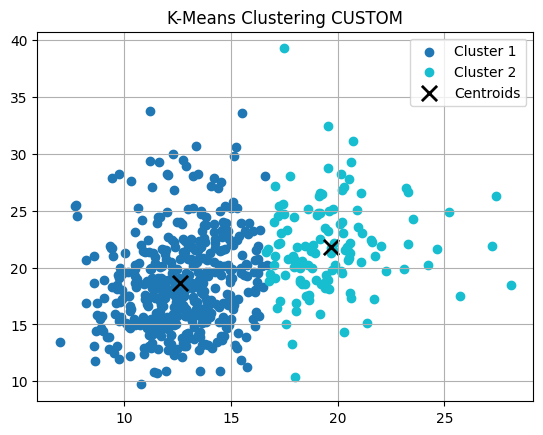

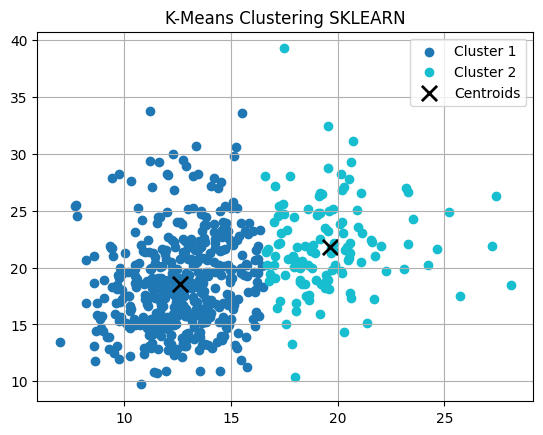

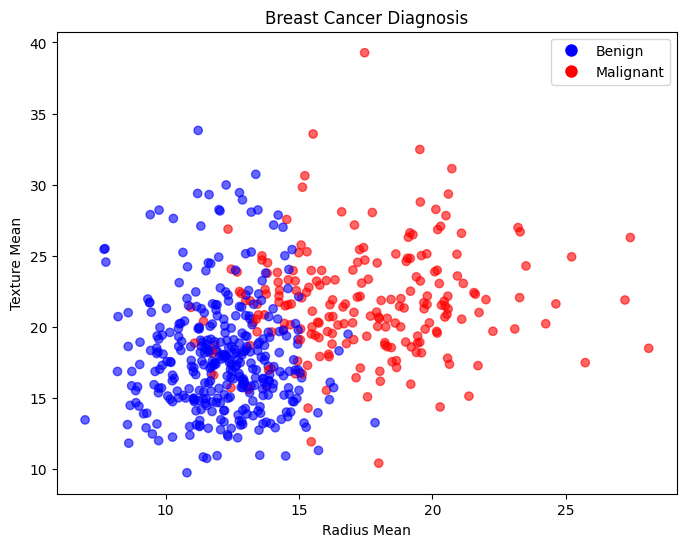

In [37]:
k = 2
from sklearn.cluster import KMeans

data = df[['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean']].values
centroids, clusters = k_means(data.tolist(), k=2)

plot_clusters(centroids, clusters, "CUSTOM")

sklearn_kmeans = KMeans(n_clusters=k, init='random', n_init=1, max_iter=100, random_state=0)
sklearn_labels = sklearn_kmeans.fit_predict(data)
sklearn_centroids = sklearn_kmeans.cluster_centers_

clusters_sklearn = [[] for _ in range(k)]
for point, label in zip(data, sklearn_labels):
    clusters_sklearn[label].append(point)

plot_clusters(sklearn_centroids, clusters_sklearn, "SKLEARN")

plt.figure(figsize=(8,6))
colors = {'B': 'blue', 'M': 'red'}

plt.scatter(df['radius_mean'], df['texture_mean'], 
            c=df['diagnosis'].map(colors), alpha=0.6)

plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('Breast Cancer Diagnosis')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Benign',
                              markerfacecolor='blue', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='Malignant',
                              markerfacecolor='red', markersize=10)])
plt.show()

Text(0, 0.5, 'Inertia')

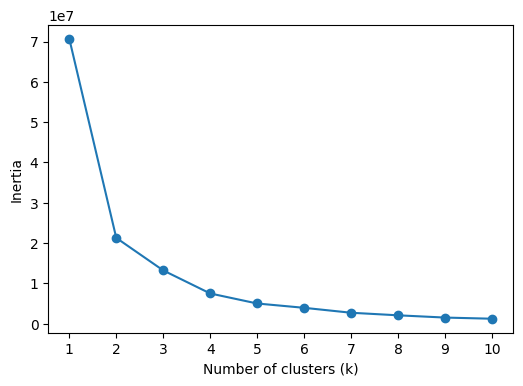

In [30]:
inertia_scores = []
ks = list(range(1, 10 + 1))
for k in ks:
    km = KMeans(n_clusters=k, n_init='auto', random_state=222)
    y_pred = km.fit_predict(data)
    inertia_scores.append(km.inertia_)
    
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(ks, inertia_scores, marker='o')
plt.xticks(ks)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

Different feature sets

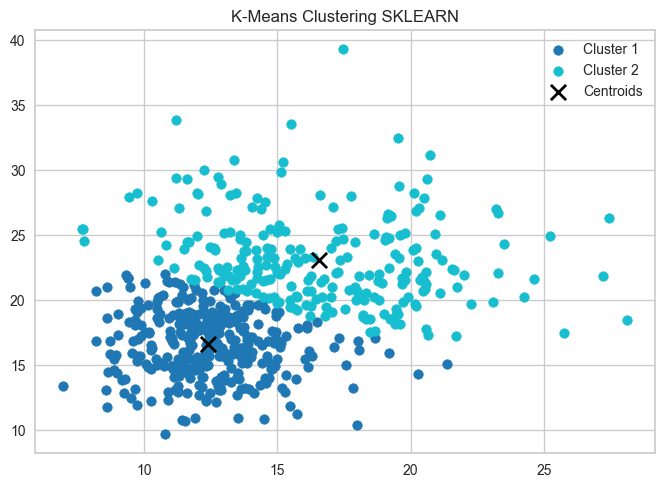

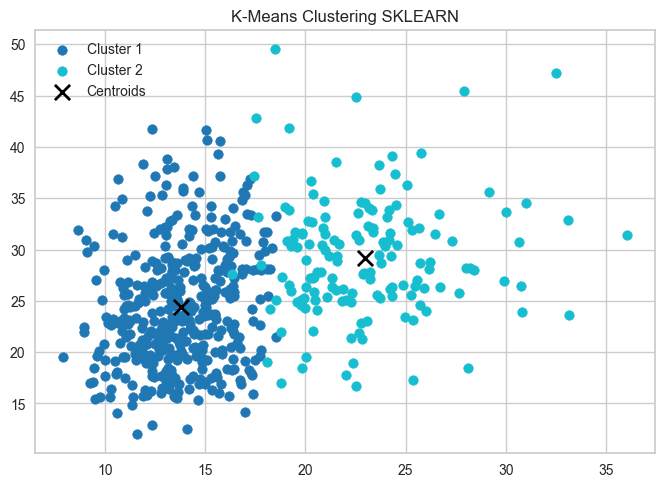

In [52]:
k=2
data = df[['radius_mean',
 'texture_mean']].values
centroids, clusters = k_means(data.tolist(), k=2)

km = KMeans(n_clusters=k, init='random', n_init=1, max_iter=100, random_state=0)
labels = km.fit_predict(data)
centroids = km.cluster_centers_

clusters = [[] for _ in range(k)]
for point, label in zip(data, labels):
    clusters[label].append(point)

plot_clusters(centroids, clusters, "SKLEARN")

data2 = df[['radius_worst',
 'texture_worst',
 'perimeter_worst']].values
centroids, clusters = k_means(data2.tolist(), k=2)

km2 = KMeans(n_clusters=k, init='random', n_init=1, max_iter=100, random_state=0)
labels2 = km2.fit_predict(data2)
centroids2 = km2.cluster_centers_

clusters2 = [[] for _ in range(k)]
for point, label in zip(data2, labels2):
    clusters2[label].append(point)

plot_clusters(centroids2, clusters2, "SKLEARN")

Estimated number of clusters: 1


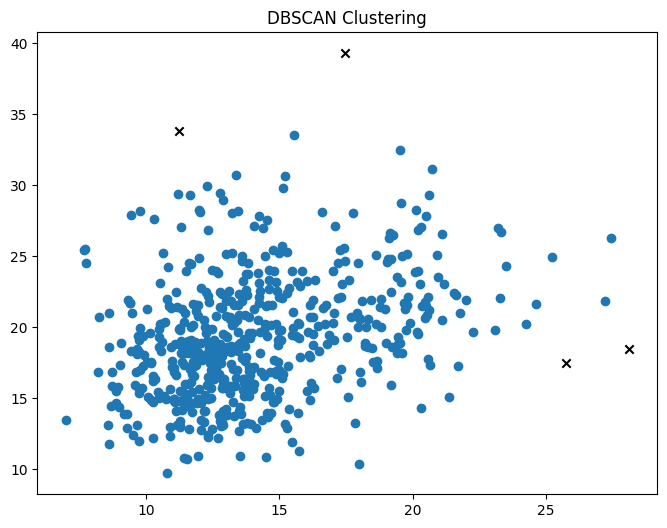

Estimated number of clusters: 8


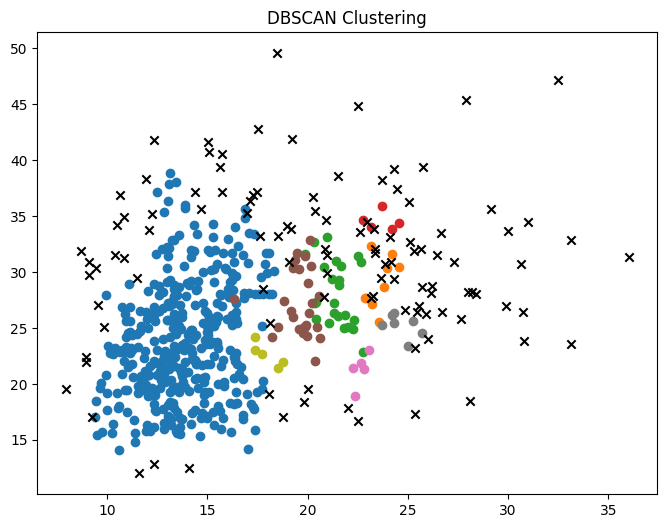

In [47]:
from sklearn.cluster import DBSCAN
def plot_dbscan(data, labels):
    unique_labels = set(labels)
    colors = plt.colormaps['tab10'].resampled(len(unique_labels))
    
    plt.figure(figsize=(8,6))
    for k in unique_labels:
        class_member_mask = (labels == k)
        
        xy = data[class_member_mask]
        if k == -1:
            plt.scatter(xy[:, 0], xy[:, 1], c='k', marker='x', label='Noise')
        else:
            plt.scatter(xy[:, 0], xy[:, 1], color=colors(k), label=f'Cluster {k+1}')
    
    plt.title('DBSCAN Clustering')
    plt.show()


data = df[['radius_mean',
 'texture_mean']].values

dbscan = DBSCAN(eps=3, min_samples=5) 
labels = dbscan.fit_predict(data)

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f'Estimated number of clusters: {n_clusters}')
plot_dbscan(data, labels)

data = df[['radius_worst',
 'texture_worst',
 'perimeter_worst']].values

dbscan = DBSCAN(eps=3, min_samples=5) 
labels = dbscan.fit_predict(data)

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f'Estimated number of clusters: {n_clusters}')
plot_dbscan(data, labels)




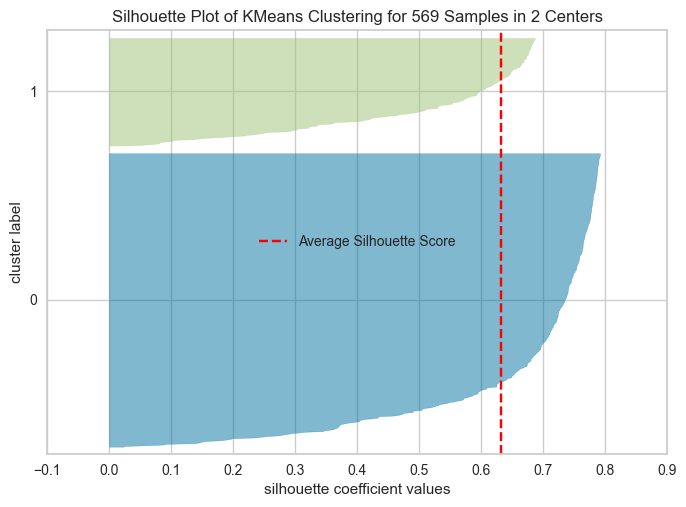

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 569 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

km2_vis = SilhouetteVisualizer(km2, colors='yellowbrick')
km2_vis.fit(data2)
km2_vis.show()
